# Naive Bayes
This is a simple model, which takes advantage of the categorical nature of our data. 
Input in the following form:

\["Age" - 20 (int), "Policy_Sales_Channel" - 1 (int), "Gender_Male", "Vehicle_Age_< 1 Year", "Vehicle_Age_> 2 Years", "Vehicle_Damage_Yes", "Previously_Insured_1"\]

Could potentially improve by adding other features (and binning "Annual_Premium"), but may be better to add to an ensemble. Note, that in an ensemble, you will want to use the random train-test split to randomly remove values.

In [9]:
import pandas as pd
import time
import pickle
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import CategoricalNB
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
#Чтение данных
data = pd.read_csv('train_short.csv')
# Показать названия всех столбцов
print("\nНазвания столбцов:")
print(data.columns.tolist())
print("\n")
# Показать первые несколько строк
print(data.nunique(axis=0))


Названия столбцов:
['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


id                      5000001
Gender                        2
Age                          66
Driving_License               2
Region_Code                  53
Previously_Insured            2
Vehicle_Age                   3
Vehicle_Damage                2
Annual_Premium            48219
Policy_Sales_Channel        149
Vintage                     290
Response                      2
dtype: int64


# Binning Code
If we want to use Annual_Premium, we probably want 10 - 100 in each bin. The problem is not completely visible here, as the class sizes are also very unequal.

In [15]:
count = data.value_counts(subset=['Annual_Premium'], sort = False)
x = count.to_numpy()
print(x)

[917778      1      1 ...      1      1     34]


In [17]:
yt = data[['Annual_Premium']]
yv = yt.to_numpy()
yv = yv.flatten()
print(yv)

[65101. 58911. 38043. ... 28302. 28447.  2630.]


In [19]:
ys = set(yv)
yl = list(ys)
y = np.array(yl)
y = np.sort(y)
print(y)

[  2630.   2642.   2698. ... 537303. 538374. 540165.]


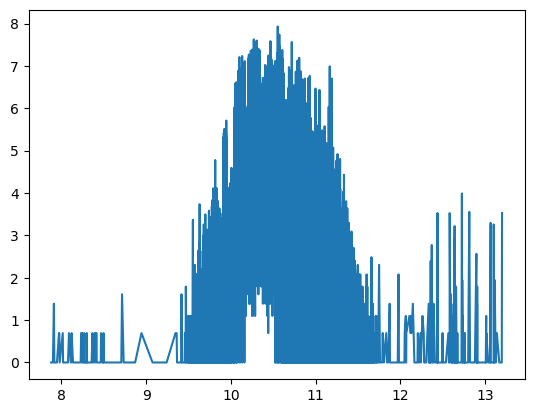

In [21]:
# plot
fig, ax = plt.subplots()

ax.plot(np.log(y[1:]), np.log(x[1:]))

plt.show()

In [193]:
np.exp(11.75)

126753.55900574342

Bin {min} = "< 12500", Bin {max} = "> 250000", Bin {max - 1} = "> 125000"

# Bayes Code

In [13]:
# Удаляем строки с пропущенными значениями (их нет)
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000001 entries, 0 to 5000000
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 457.8+ MB


In [15]:
#Оставляем только нужные столбцы
#columns_to_keep = ['Response', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
#columns_to_keep = ['Response', 'Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel']
columns_to_keep = ['Response', 'Gender', 'Age', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']
data = data[columns_to_keep]

In [17]:
#testD = pd.read_csv('test_short.csv')
#testD = testD[columns_to_keep]
#testD.head()

In [19]:
# One-hot кодирование категориальных признаков
#categorical_features = ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Driving_License', 'Previously_Insured']
categorical_features = ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Previously_Insured']

data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

length = len(data)

In [21]:
#testD = pd.get_dummies(testD, columns=categorical_features, drop_first=True)

In [23]:
# Нормализация числовых признаков
#numeric_features = ["Age", 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
#numeric_features = ["Age", 'Annual_Premium', 'Policy_Sales_Channel']
numeric_features = ["Age", 'Policy_Sales_Channel']

In [25]:
#Данные несбалансированные
data.Response.value_counts()

Response
0    4384720
1     615281
Name: count, dtype: int64

In [27]:
data[numeric_features] = data[numeric_features].convert_dtypes()
data.head()

,Response,Age,Policy_Sales_Channel,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Previously_Insured_1
0,0,21,124,True,False,False,True,False
1,1,43,26,True,False,True,True,False
2,0,25,152,False,True,False,False,True
3,0,35,156,False,False,False,True,False
4,0,36,152,False,False,False,False,True


In [29]:
print(data.nunique(axis=0))

Response                   2
Age                       66
Policy_Sales_Channel     149
Gender_Male                2
Vehicle_Age_< 1 Year       2
Vehicle_Age_> 2 Years      2
Vehicle_Damage_Yes         2
Previously_Insured_1       2
dtype: int64


In [31]:
#count = data.value_counts(subset=['Policy_Sales_Channel'])
#print(count)
#print(np.sum(np.equal(count.to_numpy(), 1)))
#data["Policy_Sales_Channel"].min()

In [33]:
# Renormalization
data["Age"] = data["Age"] - 20
data["Policy_Sales_Channel"] = data["Policy_Sales_Channel"] - 1

In [35]:
data.head()

,Response,Age,Policy_Sales_Channel,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Previously_Insured_1
0,0,1,123,True,False,False,True,False
1,1,23,25,True,False,True,True,False
2,0,5,151,False,True,False,False,True
3,0,15,155,False,False,False,True,False
4,0,16,151,False,False,False,False,True


In [37]:
#ds1 = []
#col1 = ['Response', 'Age', 'Policy_Sales_Channel', 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Vehicle_Damage_Yes', 'Previously_Insured_1']
#ds1.append(data.loc[data['Gender_Male'] == False])
#ds1.append(data.loc[data['Gender_Male'] == True])
#ds1[0]=ds1[0][col1]
#ds1[1]=ds1[1][col1]
#ds1[0].head()

In [45]:
ds2 = []
col2 = ['Response', 'Age',  'Policy_Sales_Channel', "Gender_Male", 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Previously_Insured_1']
#for i in range():
i = 0
ds2.append(data.loc[data['Vehicle_Damage_Yes'] == False])
ds2[2*i]=ds2[2*i][col2]
ds2.append(data.loc[data['Vehicle_Damage_Yes'] == True])
ds2[2*i+1]=ds2[2*i+1][col2]
ds2[0].head()

,Response,Age,Policy_Sales_Channel,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Previously_Insured_1
2,0,5,151,False,True,False,True
4,0,16,151,False,False,False,True
5,0,11,151,False,True,False,True
6,0,3,151,True,True,False,True
8,0,6,151,False,True,False,True


In [47]:
ds3 = []
col3 = ['Response', 'Age',  'Policy_Sales_Channel', "Gender_Male", 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years']
for i in range(len(ds2)):
    ds3.append(ds2[i].loc[data['Previously_Insured_1'] == False])
    ds3[2*i]=ds3[2*i][col3]
    ds3.append(ds2[i].loc[data['Previously_Insured_1'] == True])
    ds3[2*i+1]=ds3[2*i+1][col3]
ds3[0].head()

,Response,Age,Policy_Sales_Channel,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
30,0,27,25,False,False,False
64,0,24,123,True,False,False
67,0,23,25,True,False,False
69,0,21,0,False,True,False
76,0,23,25,True,False,False


In [82]:
#ds4 = []
#col4 = ['Response', 'Age', 'Policy_Sales_Channel']
#for i in range(len(ds3)):
#    ds4.append(ds3[i].loc[data['Vehicle_Age_< 1 Year'] == True])
#    ds4[3*i]=ds4[3*i][col4]
#    ds4.append(ds3[i].loc[data['Vehicle_Age_< 1 Year'] == False])
#    ds4[3*i+1]=ds4[3*i+1].loc[data['Vehicle_Age_> 2 Years'] == False]
#    ds4[3*i+1]=ds4[3*i+1][col4]
#    ds4.append(ds3[i].loc[data['Vehicle_Age_> 2 Years'] == True])
#    ds4[3*i+1]=ds4[3*i+1][col4]

    
#ds4[0].head()

#t_va0_m = t_male.loc[t_male['Vehicle_Age_< 1 Year'] == True]
#t_va2_m = t_male.loc[t_male['Vehicle_Age_> 2 Years'] == True]
#t_va1_m = t_male.loc[t_male['Vehicle_Age_> 2 Years'] == False]
#t_va1_m = t_va1_m.loc[t_va1_m['Vehicle_Age_< 1 Year'] == False]


,Response,Age,Policy_Sales_Channel
69,0,21,0
267,0,2,151
316,0,4,150
325,0,1,159
381,0,2,151


In [51]:
sum1 = 0
for i in range(4):
    sum1 = sum1 + np.shape(ds3[i])[0]
    print(np.shape(ds3[i])[0])
print(sum1)

292367
2193394
2393299
120941
5000001


In [53]:
#ds4 = []
#col4 = ['Response', 'Age', 'Policy_Sales_Channel']
#for i in range(len(ds3)):
#    ds4.append(ds3[i].loc[data['Vehicle_Age_< 1 Year'] == True])
#    ds4[2*i]=ds4[2*i][col4]
#    ds4.append(ds3[i].loc[data['Vehicle_Age_< 1 Year'] == False])
#    ds4[2*i+1]=ds4[2*i+1][col4]

In [55]:
#sum1 = 0
#for i in range(16):
#    sum1 = sum1 + np.shape(ds4[i])[0]
#    print(np.shape(ds4[i])[0])
#print(sum1)

In [59]:
for i in range(4):
    print(ds3[i].Response.value_counts())

Response
0    282584
1      9783
Name: count, dtype: int64
Response
0    2192702
1        692
Name: count, dtype: int64
Response
0    1789273
1     604026
Name: count, dtype: int64
Response
0    120161
1       780
Name: count, dtype: int64


In [59]:
# Разделение на признаки (X) и целевую переменную (y)
#X = data.drop('Response', axis=1)
#y = data['Response']

# Разделение на обучающую и тестовую выборки. Только для проверки PCA, потом надо заменить на кросс-валидацию
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

In [63]:
# Разделение на признаки (X) и целевую переменную (y)
X = []
y = []
X_train = []
y_train = []
X_test = []
y_test = []

for i in range(4):
    X.append(ds3[i].drop('Response', axis=1))
    y.append(ds3[i]['Response'])
    X_tr, X_te, y_tr, y_te = train_test_split(X[i], y[i], test_size=0.20, stratify=y[i])
    X_train.append(X_tr)
    y_train.append(y_tr)
    X_test.append(X_te)
    y_test.append(y_te)

# Разделение на обучающую и тестовую выборки. Только для проверки PCA, потом надо заменить на кросс-валидацию


In [77]:
#t_start = time.time()

#n_cat = [65, 170, 2, 2, 2, 2, 2]

#clf = CategoricalNB(min_categories = n_cat)
#clf.fit(X_train, y_train)


#t_finish = time.time()
#dt = t_finish - t_start
#dt2 = dt / 60.

#print(clf.score(X_test, y_test))
#print("Time: ",  dt, " sec or ", dt2, "min")

0.7405142594857406
Time:  4.191648483276367  sec or  0.06986080805460612 min


In [110]:
#X_train[0].head()

,Age,Policy_Sales_Channel
4734451,1,151
2313137,5,151
1063725,5,25
2664978,7,151
1575158,3,151


In [65]:
t_start = time.time()

n_cat = [65, 170, 2, 2, 2]
clf = []
y_lab = []

for i in range(4):
    clf.append(CategoricalNB(min_categories = n_cat))
    print(clf[i])
    clf[i].fit(X_train[i], y_train[i])
    print(clf[i].score(X_test[i], y_test[i]))
    y_lab.append(clf[i].predict(X_test[i]))
    print(f1_score(y_test[i], y_lab[i]))
    print(confusion_matrix(y_test[i], y_lab[i]))
    print("\n")

t_finish = time.time()
dt = t_finish - t_start
dt2 = dt / 60.
print("Time: ",  dt, " sec or ", dt2, "min")

CategoricalNB(min_categories=[65, 170, 2, 2, 2])
0.9665321339398707
0.0
[[56517     0]
 [ 1957     0]]


CategoricalNB(min_categories=[65, 170, 2, 2, 2])
0.9996649030384404
0.0
[[438532      9]
 [   138      0]]


CategoricalNB(min_categories=[65, 170, 2, 2, 2])
0.7453035557598295
0.04322678365418573
[[353993   3862]
 [118051   2754]]


CategoricalNB(min_categories=[65, 170, 2, 2, 2])
0.9934681053371367
0.0
[[24031     2]
 [  156     0]]


Time:  3.314948320388794  sec or  0.05524913867314656 min


In [94]:
y_lab = clf.predict(X_test)

In [96]:
f1_score(y_test, y_lab)

0.43464606768527525

In [98]:
confusion_matrix(y_test, y_lab)

array([[641117, 235828],
       [ 23406,  99650]], dtype=int64)

In [92]:
clf.fit(X, y)

CategoricalNB(min_categories=[65, 170, 2, 2, 2, 2, 2])

In [ ]:
# other variants -- 
# annual premium can be added back in, but needs to be binned
# perhaps accounting for correlation is possible 150 * 66 * 2^5 = 316 800 (out of 5 mil)
# this could be put in an ensemble with another model (like decision tree without policy channel) 

In [100]:
# Сохранение модели в файл
model_filename = "bayes_class_model_001.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(clf, file)
print(f"Модель сохранена в файл: {model_filename}")

Модель сохранена в файл: bayes_class_model_001.pkl
